In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
price_data_path = "../res/data/ee_prices.csv"
df = pd.read_csv(price_data_path)

In [5]:
df.head()

,unixtime,belgium,denmark_west,denmark_east,france,netherlands,norway,sweden,switzerland,czech_republic,germany,italy,slovenia,hungary
0,1420071300,36.56,25.02,27.38,36.56,36.56,27.40,27.38,44.94,26.48,22.34,47.72,27.30,45.07
1,1420072200,36.56,25.02,27.38,36.56,36.56,27.40,27.38,44.94,26.48,22.34,47.72,27.30,45.07
2,1420073100,36.56,25.02,27.38,36.56,36.56,27.40,27.38,44.94,26.48,22.34,47.72,27.30,45.07
3,1420074000,36.56,25.02,27.38,36.56,36.56,27.40,27.38,44.94,26.48,22.34,47.72,27.30,45.07
4,1420074900,36.56,18.29,18.29,36.56,36.56,27.07,23.37,43.43,24.20,22.34,47.72,23.25,44.16


In [6]:
# Convert unixtime to datetime
df['datetime'] = pd.to_datetime(df['unixtime'], unit='s')

# Check if the data is ordered
is_ordered = df['datetime'].is_monotonic_increasing

# Check for missing data
expected_time_diff = df['datetime'].diff().mode()[0]
actual_time_diff = df['datetime'].diff().dropna()

has_no_holes = (actual_time_diff == expected_time_diff).all()

print(f"Data is ordered: {is_ordered}")
print(f"Data has no holes: {has_no_holes}")
print(f"Expected time difference: {expected_time_diff}")

Data is ordered: True
Data has no holes: True
Expected time difference: 0 days 00:15:00


In [7]:
# Order the data based on the unix time index
df = df.sort_values(by='unixtime').drop_duplicates(subset='unixtime')
df = df.reset_index(drop=True)

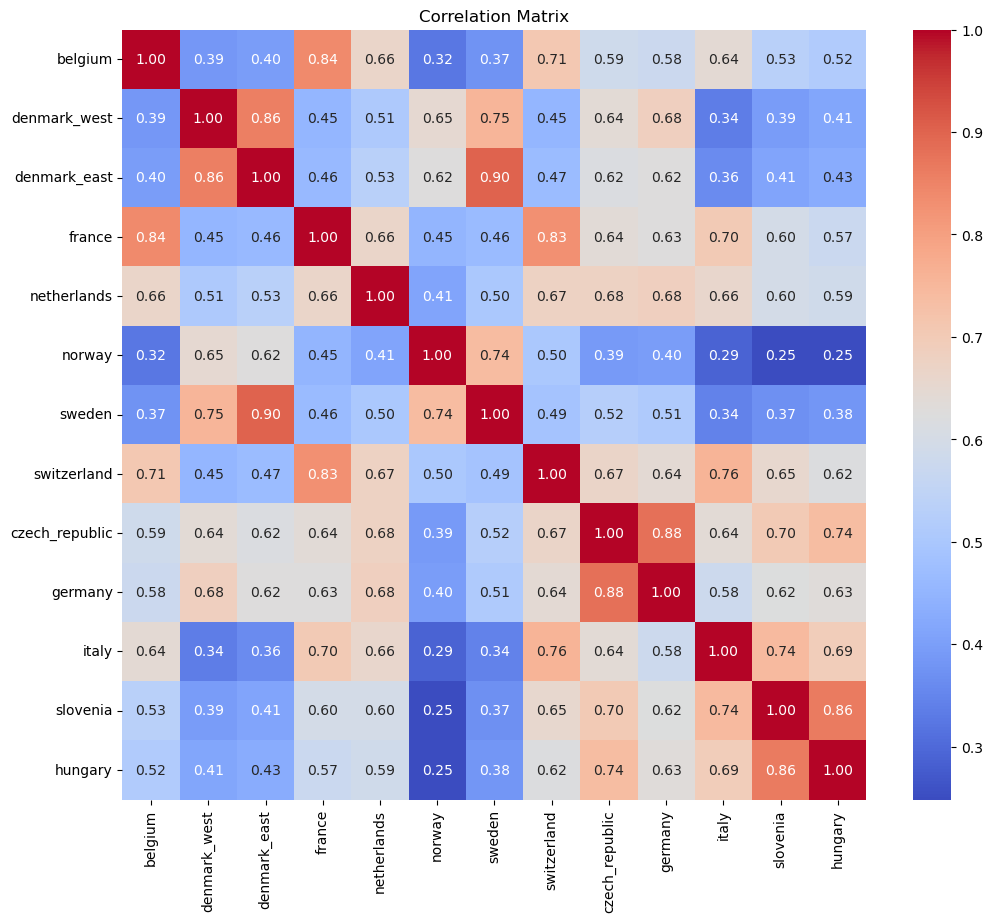

In [8]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['datetime', 'unixtime']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()